In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [26]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 9, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [27]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product',
        'Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']

# 1. DATA CLEANSING

In [28]:
df = pd.read_csv('Train.csv')

In [29]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [30]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
6069,6070,B,Ship,3,4,156,2,medium,F,10,5107,1
7867,7868,F,Ship,4,3,213,3,medium,M,4,4367,0
5163,5164,B,Ship,4,5,154,3,medium,F,9,5489,1
9097,9098,F,Ship,4,2,231,5,medium,M,8,1562,0
10247,10248,F,Ship,4,3,195,3,medium,M,5,5863,0


## A. Handle Missing Values

In [31]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Tidak ada missing values

## B. Handle Duplicated Data

In [33]:
df[nums].duplicated().sum()

0

Tidak ada data yang duplicated

## C. Handle Outliers

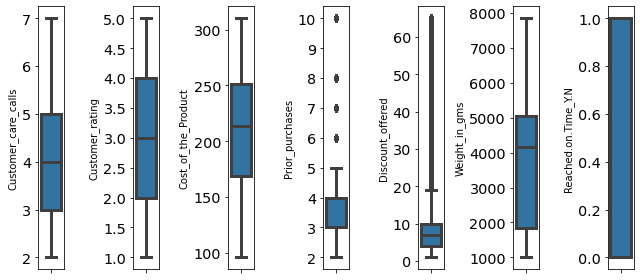

In [34]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()
    plt.savefig('boxplot_outlier1')

<h2>Terdapat Outlier pada Features Prior Purchases dan Discount Offered. Maka akan dilakukan penghapusan outlier dengan menggunakan IQR</h2>

In [35]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in ['Prior_purchases','Discount_offered']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 7971


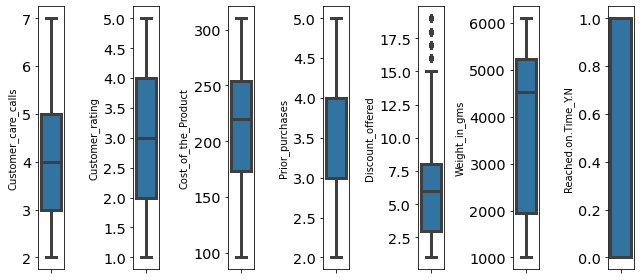

In [36]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()
    plt.savefig('boxplot_outlier2')

<h3> Setelah dilakukan hapus outlier dengan IQR masih terdapat outlier di Discount offered maka akan dilakukan Feature Transformation agar persebaran mendekati normal</h3>

## D. Feature Transformation

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

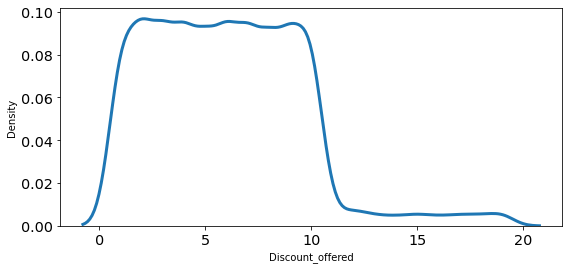

In [37]:
sns.kdeplot(df['Discount_offered'])

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

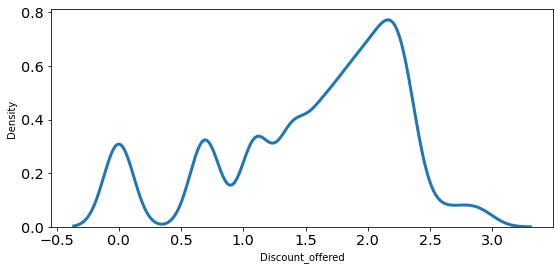

In [38]:
sns.kdeplot(np.log(df['Discount_offered']))

<h3>Setelah di Log Transformation</h3>

In [39]:
df['Log_Discount_offered'] = np.log(df['Discount_offered'])
df[['Discount_offered','Log_Discount_offered']].describe()

,Discount_offered,Log_Discount_offered
count,7971.000000,7971.000000
mean,5.986953,1.571069
std,3.547644,0.726226
min,1.000000,0.000000
25%,3.000000,1.098612
50%,6.000000,1.791759
75%,8.000000,2.079442
max,19.000000,2.944439


Menunjukkan perbedaan Discount_offered sebelum dan setelah di Log Transformation

## E. Feature Encoding

Terdapat 4 Feature yang akan di Encoding yaitu
    <br>1. Warehouse_block
    <br>2. Mode_of_Shipment
    <br>3. Product_importance
    <br>4. Gender
    

In [40]:
df['Gender'] = df['Gender'].astype('category').cat.codes
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_Discount_offered
3,4,B,Flight,3,3,176,4,medium,1,10,1177,1,2.302585
5,6,F,Flight,3,1,162,3,medium,0,12,1417,1,2.484907
6,7,D,Flight,3,4,250,3,low,0,3,2371,1,1.098612
8,9,A,Flight,3,4,150,3,low,0,11,1861,1,2.397895
10,11,C,Flight,3,4,189,2,medium,1,12,2888,1,2.484907


<h3>Untuk Gender menggunakan Label Encorder karena jumlah distinct values = 2. </h3>

In [41]:
for cat in ['Warehouse_block','Mode_of_Shipment','Product_importance']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [42]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
3,4,B,Flight,3,3,176,4,medium,1,10,...,1,0,0,0,1,0,0,0,0,1
5,6,F,Flight,3,1,162,3,medium,0,12,...,0,0,0,1,1,0,0,0,0,1
6,7,D,Flight,3,4,250,3,low,0,3,...,0,0,1,0,1,0,0,0,1,0
8,9,A,Flight,3,4,150,3,low,0,11,...,0,0,0,0,1,0,0,0,1,0
10,11,C,Flight,3,4,189,2,medium,1,12,...,0,1,0,0,1,0,0,0,0,1


<h3>Warehouse_block, Mode_of_Shipment,Product_importance menggunakan One Hot Encoder karena jumlah distinct  > 2 dan cocok untuk fitur non-hierarki di mana tidak ada hubungan antara satu variabel dengan variabel lainnya</h3>

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7971 entries, 3 to 10998
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         7971 non-null   int64  
 1   Warehouse_block            7971 non-null   object 
 2   Mode_of_Shipment           7971 non-null   object 
 3   Customer_care_calls        7971 non-null   int64  
 4   Customer_rating            7971 non-null   int64  
 5   Cost_of_the_Product        7971 non-null   int64  
 6   Prior_purchases            7971 non-null   int64  
 7   Product_importance         7971 non-null   object 
 8   Gender                     7971 non-null   int8   
 9   Discount_offered           7971 non-null   int64  
 10  Weight_in_gms              7971 non-null   int64  
 11  Reached.on.Time_Y.N        7971 non-null   int64  
 12  Log_Discount_offered       7971 non-null   float64
 13  Warehouse_block_A          7971 non-null   uint

## F. Handle Class Imbalance

<AxesSubplot:ylabel='Reached.on.Time_Y.N'>

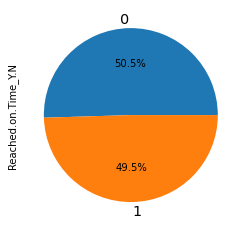

In [44]:
df['Reached.on.Time_Y.N'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<h3> Tidak Perlu Handle Class Imbalance karena Reached.on.Time_Y.N hampir seimbang </h3>

# 2. Feature Engineering

### A. Feature Selection

Untuk memilih feature yang akan digunakan dalam modelling, akan dilihat korelasi antara feature dengan target. Perhitungan korelasi yang digunakan menggunakan pearson correlation dan disajikan dalam matriks heatmap berikut.

<AxesSubplot:>

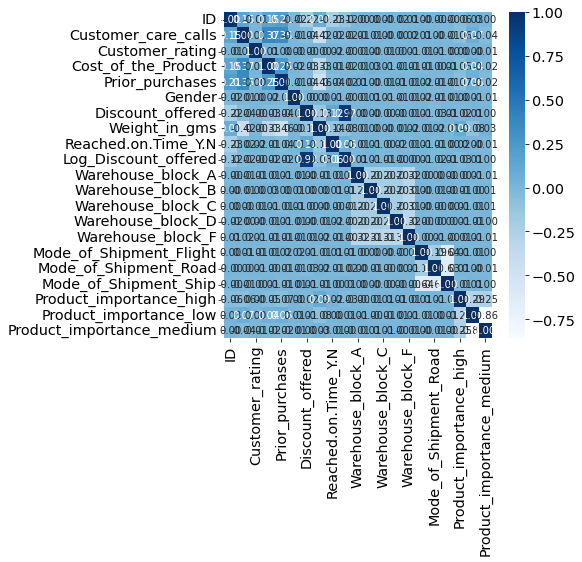

In [45]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Pada baris paling bawah (nilai korelasi terhadap kolom target : reached on time), terlihat hampir semua kotak cenderung berwarna biru muda, yang berarti nilainya mendekati 0. Ini menandakan bahwa hampir semua feature tidak memiliki korelasi yang kuat dengan dengan kolom target reached on time. 


### B. Feature Extraction

- Membagi data discount offered, brdasarkan yg dapet discount 
1. kecil
2. sedang
3. besar banget (discount2 yg pada outlier)

In [47]:
df['Discount_offered'] = pd.qcut(df['Discount_offered'],3,labels=[0,1,2])

In [49]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Cost_of_the_Product_std,Weight_in_gms_std
3,4,B,Flight,3,3,176,4,medium,1,2,...,0,0,1,0,0,0,0,1,-0.781413,-1.716621
5,6,F,Flight,3,1,162,3,medium,0,2,...,0,1,1,0,0,0,0,1,-1.071699,-1.568407
6,7,D,Flight,3,4,250,3,low,0,0,...,1,0,1,0,0,0,1,0,0.752955,-0.979258
8,9,A,Flight,3,4,150,3,low,0,2,...,0,0,1,0,0,0,1,0,-1.320516,-1.294212
10,11,C,Flight,3,4,189,2,medium,1,2,...,0,0,1,0,0,0,0,1,-0.511862,-0.659981


In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cost_of_the_Produc dan Weight_in_gms gaji kita standarisasi (karena distribusi datanya sudah mendekati normal)
df['Cost_of_the_Product_std'] = StandardScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['Weight_in_gms_std'] = StandardScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

### C. Feature Rekomendasi

- package size 

- distance
- apakah beda pulau
- product category
- biaya pengiriman